In [9]:
l1 = [2,2,2,3,3,3,6,5,4,4,4,3,3,3]
count = Counter(l1)
print(count)
count.most_common(1)
count.most_common(2)[1][0]

Counter({3: 6, 2: 3, 4: 3, 6: 1, 5: 1})


2

In [1]:
# import libraries
from langdetect import detect
from googletrans import Translator
# pip install googletrans == 3.1.0a0
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import contractions
import yake
from rake_nltk import Rake
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

ModuleNotFoundError: No module named 'langdetect'

In [11]:
data = pd.read_csv('dataset_es_train.csv')
data.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics


In [12]:
data.shape

(200000, 8)

In [13]:
sample = data.sample(1000)
sample.reset_index(drop=True, inplace=True)

In [14]:
sample

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0502090,product_es_0894429,reviewer_es_0199541,4,Se compró para llevar tarjetas de visita profe...,Correcto,es,home
1,es_0613432,product_es_0631262,reviewer_es_0431717,4,El producto huele un poco a plástico pero será...,Brochas media calidad,es,beauty
2,es_0572815,product_es_0666947,reviewer_es_0120075,1,Llegó con la barra central doblada y tenia 6 g...,Estafa,es,home
3,es_0838701,product_es_0084231,reviewer_es_0974937,3,No se queda como esperaba.,Regular,es,drugstore
4,es_0187992,product_es_0606358,reviewer_es_0480383,4,"Facil montaje, muy robusto y buena estetica. T...",Embalaje mejorable,es,automotive
...,...,...,...,...,...,...,...,...
995,es_0577194,product_es_0094234,reviewer_es_0629962,5,"Me ha gustado mucho el altavoz, lo compre para...",Sonido,es,electronics
996,es_0229910,product_es_0130776,reviewer_es_0512189,5,Muy buena relación calidad precio. Funciona pe...,Muy buena relación calidad precio,es,other
997,es_0044197,product_es_0298044,reviewer_es_0624626,4,Rapida entrega tal como se ve en la foto buena...,Va de maravilla,es,sports
998,es_0609908,product_es_0573514,reviewer_es_0281823,2,La batería tiene buena pinta pero no es de 100...,No dura,es,electronics


In [15]:
df = sample[['review_body','stars']]
df

,review_body,stars
0,Se compró para llevar tarjetas de visita profe...,4
1,El producto huele un poco a plástico pero será...,4
2,Llegó con la barra central doblada y tenia 6 g...,1
3,No se queda como esperaba.,3
4,"Facil montaje, muy robusto y buena estetica. T...",4
...,...,...
995,"Me ha gustado mucho el altavoz, lo compre para...",5
996,Muy buena relación calidad precio. Funciona pe...,5
997,Rapida entrega tal como se ve en la foto buena...,4
998,La batería tiene buena pinta pero no es de 100...,2


In [16]:
# language detection
def lang_detect(data):
    lang = detect(data)
    return lang

In [18]:
print(df.review_body[0])
lang_detect(df.review_body[0])

Se compró para llevar tarjetas de visita profesionales. Es un preoducto correcto dado el precio y además venian dos unidades. Se ralla un poco si lo llevas en el bolsillo con alguna llave.


'es'

In [19]:
df['language'] = df.review_body.apply(lang_detect)

In [20]:
df

,review_body,stars,language
0,Se compró para llevar tarjetas de visita profe...,4,es
1,El producto huele un poco a plástico pero será...,4,es
2,Llegó con la barra central doblada y tenia 6 g...,1,es
3,No se queda como esperaba.,3,es
4,"Facil montaje, muy robusto y buena estetica. T...",4,es
...,...,...,...
995,"Me ha gustado mucho el altavoz, lo compre para...",5,es
996,Muy buena relación calidad precio. Funciona pe...,5,es
997,Rapida entrega tal como se ve en la foto buena...,4,es
998,La batería tiene buena pinta pero no es de 100...,2,es


In [21]:
df.language.unique()

array(['es', 'pt', 'vi', 'de', 'en', 'cs', 'ca', 'nl', 'so'], dtype=object)

In [22]:
df.language.value_counts()

es    977
pt     13
en      3
ca      2
vi      1
de      1
cs      1
nl      1
so      1
Name: language, dtype: int64

In [23]:
def lang_trans(data):
    translor = Translator()
    translated_text = translor.translate(data)
    return translated_text.text

In [24]:
print(df.review_body[0])
lang_trans(df.review_body[0])

Se compró para llevar tarjetas de visita profesionales. Es un preoducto correcto dado el precio y además venian dos unidades. Se ralla un poco si lo llevas en el bolsillo con alguna llave.


'Purchased to carry professional business cards. It is a correct product given the price and also two units came. It scratches a little if you carry it in your pocket with a key.'

In [25]:
df['translated_reviews'] = df.review_body.apply(lang_trans)

In [26]:
df

,review_body,stars,language,translated_reviews
0,Se compró para llevar tarjetas de visita profe...,4,es,Purchased to carry professional business cards...
1,El producto huele un poco a plástico pero será...,4,es,The product smells a bit of plastic but it wil...
2,Llegó con la barra central doblada y tenia 6 g...,1,es,It arrived with the central bar bent and had 6...
3,No se queda como esperaba.,3,es,It doesn't stay as expected.
4,"Facil montaje, muy robusto y buena estetica. T...",4,es,"Easy assembly, very robust and good aesthetics..."
...,...,...,...,...
995,"Me ha gustado mucho el altavoz, lo compre para...",5,es,"I really liked the speaker, I bought it for my..."
996,Muy buena relación calidad precio. Funciona pe...,5,es,There is a good quality price relation. It wor...
997,Rapida entrega tal como se ve en la foto buena...,4,es,"Fast delivery as seen in the photo, good quali..."
998,La batería tiene buena pinta pero no es de 100...,2,es,"The battery looks good but it is not 10000mAh,..."


In [27]:
# EDA
# ngrams

def ngram_extractor(data,ngram_range):
    tokens = word_tokenize(data)
    ngram = ngrams(tokens,ngram_range)
    ngram_list1 = []
    for ngram1 in ngram:
        ngram_list1.append(' '.join(ngram1))
    return ngram_list1

list_unigrams = df.translated_reviews.apply(lambda x : ngram_extractor(x,1))

final_unigram = []
for unigram in list_unigrams:
    final_unigram.extend(unigram)
cnt = Counter(final_unigram).most_common(25)

In [28]:
cnt

[('the', 1540),
 ('.', 1458),
 (',', 1329),
 ('it', 1314),
 ('I', 934),
 ('and', 884),
 ('is', 743),
 ('to', 696),
 ('a', 612),
 ('not', 448),
 ('of', 410),
 ('that', 399),
 ('for', 375),
 ('very', 340),
 ('It', 334),
 ('have', 294),
 ('The', 293),
 ('in', 289),
 ('but', 282),
 ('with', 276),
 ('they', 259),
 ("n't", 213),
 ('good', 201),
 ('are', 197),
 ('you', 195)]

In [29]:
# preprocessing 
def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text
stopword_list = stopwords.words("english")
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
    tokens = word_tokenize(data)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]
    return clean_text                        #and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]


In [30]:
clean_text = df.translated_reviews.apply(expand_text)
clean_text = clean_text.apply(clean_data)

In [31]:
clean_text

0      [purchased, carry, professional, business, car...
1      [product, smells, bit, plastic, normal, suppos...
2      [arrived, central, bar, bent, hooks, per, floo...
3                                  [not, stay, expected]
4      [easy, assembly, robust, good, aesthetics, pie...
                             ...                        
995    [really, liked, speaker, bought, partner, happ...
996    [good, quality, price, relation, works, perfec...
997    [fast, delivery, seen, photo, good, quality, h...
998    [battery, looks, good, not, another, another, ...
999      [put, pocket, keys, first, day, got, scratched]
Name: translated_reviews, Length: 1000, dtype: object

In [33]:
list_unigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),1))

final_unigram = []
for unigram in list_unigrams:
    final_unigram.extend(unigram)
cnt = Counter(final_unigram).most_common(25)

In [34]:
cnt

[('not', 682),
 ('good', 253),
 ('quality', 174),
 ('well', 140),
 ('one', 118),
 ('product', 98),
 ('like', 98),
 ('use', 91),
 ('price', 88),
 ('little', 83),
 ('arrived', 74),
 ('perfect', 67),
 ('bought', 65),
 ('great', 61),
 ('time', 61),
 ('expected', 59),
 ('put', 58),
 ('much', 57),
 ('although', 56),
 ('would', 56),
 ('also', 53),
 ('even', 51),
 ('since', 49),
 ('work', 48),
 ('bad', 48)]

In [36]:
list_bigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),2))

final_bigrams = []
for bigrams in list_bigrams:
    final_bigrams.extend(bigrams)
cnt = Counter(final_bigrams).most_common(25)

In [37]:
cnt

[('good quality', 49),
 ('not work', 33),
 ('not know', 29),
 ('not like', 23),
 ('poor quality', 21),
 ('not bad', 19),
 ('not recommend', 18),
 ('not give', 17),
 ('not received', 17),
 ('quality price', 15),
 ('not buy', 14),
 ('not arrive', 13),
 ('not worth', 12),
 ('not fit', 12),
 ('good price', 11),
 ('fulfills function', 11),
 ('value money', 10),
 ('not even', 10),
 ('would not', 10),
 ('give stars', 10),
 ('product not', 9),
 ('not arrived', 9),
 ('works well', 9),
 ('long time', 9),
 ('not put', 9)]

In [38]:
list_trigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),3))

final_trigrams = []
for trigrams in list_trigrams:
    final_trigrams.extend(trigrams)
cnt = Counter(final_trigrams).most_common(25)

In [39]:
cnt

[('good value money', 6),
 ('would not buy', 5),
 ('good quality price', 5),
 ('quality price good', 5),
 ('not like much', 5),
 ('still not received', 4),
 ('not received order', 4),
 ('not give stars', 4),
 ('not fit well', 4),
 ('good sound quality', 3),
 ('not cover entire', 3),
 ('size year old', 3),
 ('year old son', 3),
 ('not work well', 3),
 ('not cover screen', 3),
 ('not know not', 3),
 ('good quality not', 3),
 ('not rate not', 3),
 ('lasts long time', 3),
 ('another one not', 3),
 ('took long time', 3),
 ('long time arrive', 3),
 ('product not arrive', 3),
 ('arrived good condition', 3),
 ('not put stars', 3)]

In [40]:
test = df[(df.stars<3)].reset_index(drop=True)

In [41]:
test

,review_body,stars,language,translated_reviews
0,Llegó con la barra central doblada y tenia 6 g...,1,es,It arrived with the central bar bent and had 6...
1,Aparentemente es perfecto pero al ponerlo en l...,2,es,Apparently it is perfect but when we put it on...
2,Puntuo negativo porque el plazo de entrega me ...,2,es,Negative score because the delivery time seems...
3,LA parte superior de la bandeja esta llena de ...,2,es,The upper part of the tray is full of peaks an...
4,De vez en cuando falla,2,es,Occasionally it fails
...,...,...,...,...
397,Lamentablemente no recibí producto porque segú...,1,es,Unfortunately I did not receive the product be...
398,LO único que hace es ensuciar la piscina,2,es,All he does is dirty the pool
399,El producto está bien. Lo que no me parece bie...,2,es,The product is fine. What does not seem right ...
400,Todos los botones tenían algunas perlas sueltas,2,es,All buttons had some loose pearls


In [42]:
clean_text = test.translated_reviews.apply(expand_text)
clean_text = clean_text.apply(clean_data)
list_trigrams = clean_text.apply(lambda x : ngram_extractor(' '.join(x),3))

final_trigrams = []
for trigrams in list_trigrams:
    final_trigrams.extend(trigrams)
cnt = Counter(final_trigrams).most_common(25)
cnt

[('still not received', 4),
 ('not received order', 4),
 ('not fit well', 4),
 ('not like much', 4),
 ('not cover entire', 3),
 ('not work well', 3),
 ('not rate not', 3),
 ('another one not', 3),
 ('product not arrive', 3),
 ('return not work', 2),
 ('expected something else', 2),
 ('not seem practical', 2),
 ('recommend not buying', 2),
 ('not cover screen', 2),
 ('not make good', 2),
 ('make good contact', 2),
 ('not know not', 2),
 ('order arrived time', 2),
 ('arrived time box', 2),
 ('broke right away', 2),
 ('would not buy', 2),
 ('rate not received', 2),
 ('not received yet', 2),
 ('stopped working not', 2),
 ('not received product', 2)]

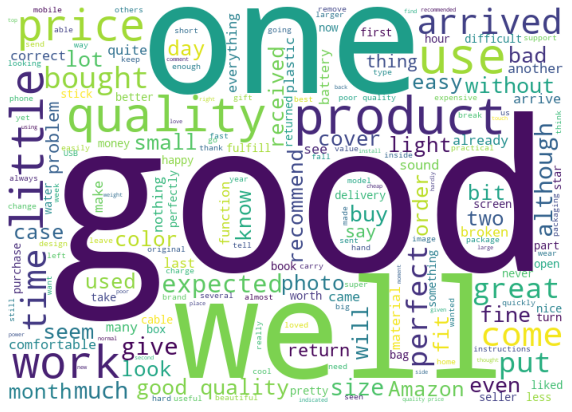

In [45]:
# wordcloud
'w1, w2, w3'
def wordcloud(data,column):
    df_ = data[column].str.cat(sep = ' ') # column to string >> 'rev_1,rev_2'
    text = ' '.join([word for word in df_.split()]) # ['w1','w2'] >> 'w1,w2'
    wordcloud = WordCloud(width = 700, height = 500, background_color = 'white').generate(text)
    plt.figure(figsize= (10,16))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
wordcloud(df,'translated_reviews')

In [46]:
# key_phrase extractor
def yake_extractor(data):
    keyword_extractor = yake.KeywordExtractor()
    keywords = keyword_extractor.extract_keywords(data)
    keyword_list = []
    for kw in keywords:
        keyword_list.append(kw[0])
    return keyword_list
keywords = df.translated_reviews.apply(yake_extractor)
all_keywords = []
for kw in keywords:
    all_keywords.extend(kw)
    
cnt = Counter(all_keywords).most_common(1000)
cnt

[('good', 158),
 ('quality', 143),
 ('product', 74),
 ('price', 70),
 ('arrived', 63),
 ('expected', 55),
 ('bought', 52),
 ('time', 45),
 ('great', 44),
 ('fine', 43),
 ('perfect', 42),
 ('lot', 42),
 ('Good', 41),
 ('size', 39),
 ('work', 39),
 ('bad', 39),
 ('put', 38),
 ('small', 38),
 ('bit', 37),
 ('works', 37),
 ('give', 36),
 ('good quality', 36),
 ('comfortable', 34),
 ('received', 33),
 ('recommend', 32),
 ('perfectly', 31),
 ('order', 30),
 ('buy', 29),
 ('Amazon', 28),
 ('photo', 28),
 ('poor', 28),
 ('cover', 26),
 ('case', 25),
 ('day', 25),
 ('light', 25),
 ('arrive', 25),
 ('easy', 24),
 ('problem', 24),
 ('return', 23),
 ('fit', 23),
 ('function', 23),
 ('nice', 23),
 ('broken', 23),
 ('correct', 22),
 ('plastic', 22),
 ('money', 22),
 ('color', 22),
 ('thing', 22),
 ('returned', 21),
 ('pretty', 20),
 ('delivery', 19),
 ('worth', 19),
 ('days', 19),
 ('times', 19),
 ('stars', 18),
 ('fits', 18),
 ('screen', 18),
 ('water', 18),
 ('condition', 17),
 ('box', 17),
 ('sou

In [47]:
# rake 
def rake_extractor(data):
    keyword_extractor = Rake()
    keyword_extractor.extract_keywords_from_text(data)
    return keyword_extractor.get_ranked_phrases()
rake_keywords = df.translated_reviews.apply(rake_extractor)
all_keywords = []
for kw in rake_keywords:
    all_keywords.extend(kw)
cnt = Counter(all_keywords).most_common(100)
cnt

[('use', 70),
 ('good', 66),
 ('product', 59),
 ('price', 54),
 ('like', 53),
 ('bought', 47),
 ('lot', 46),
 ('expected', 45),
 ('although', 45),
 ('well', 45),
 ('put', 43),
 ('one', 43),
 ('quality', 38),
 ('know', 38),
 ('give', 38),
 ('fine', 37),
 ('perfect', 37),
 ('good quality', 37),
 ('easy', 35),
 ('comfortable', 34),
 ('recommend', 33),
 ('work', 32),
 ('little', 31),
 ('received', 31),
 ('see', 31),
 ('arrived', 28),
 ('return', 28),
 ('buy', 28),
 ('case', 28),
 ('since', 26),
 ('photo', 26),
 ('used', 25),
 ('returned', 24),
 ('bad', 24),
 ('small', 24),
 ('order', 23),
 ('problem', 23),
 ('light', 23),
 ('also', 23),
 ('happy', 22),
 ('comes', 22),
 ('liked', 22),
 ('would', 22),
 ('time', 22),
 ('difficult', 21),
 ('great', 21),
 ('even', 20),
 ('function', 20),
 ('come', 20),
 ('arrive', 20),
 ('money', 19),
 ('size', 19),
 ('much', 18),
 ('able', 18),
 ('think', 18),
 ('nice', 18),
 ('poor quality', 18),
 ('cover', 17),
 ('broken', 17),
 ('worth', 17),
 ('amazon', 17

In [ ]:
for 
end = ' '
'data science'
[data, science]